In [1]:
import pandas as pd
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB
None


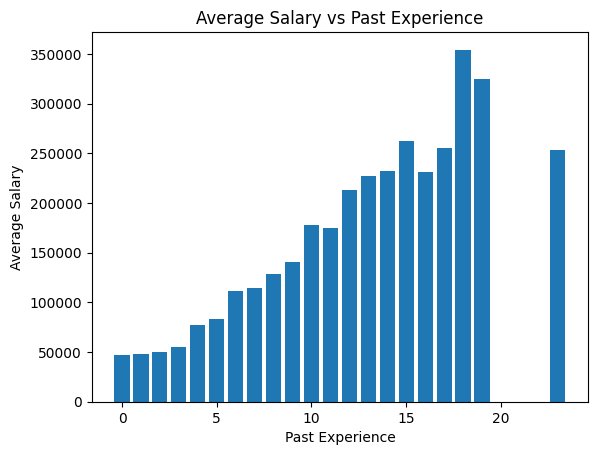

In [3]:
import matplotlib.pyplot as plt

exp_salary = df.groupby('PAST EXP')['SALARY'].mean().reset_index()

plt.bar(exp_salary['PAST EXP'], exp_salary['SALARY'])
plt.xlabel('Past Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary vs Past Experience')
plt.show()


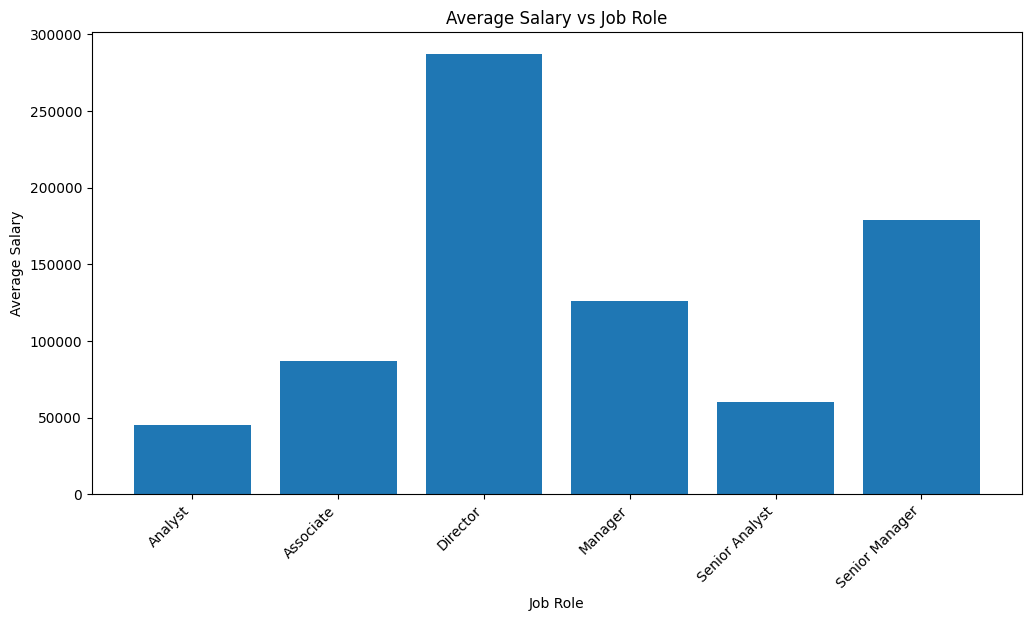

In [4]:
job_salary = df.groupby('DESIGNATION')['SALARY'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(job_salary['DESIGNATION'], job_salary['SALARY'])
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.title('Average Salary vs Job Role')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-5-99a5bc3e7255>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


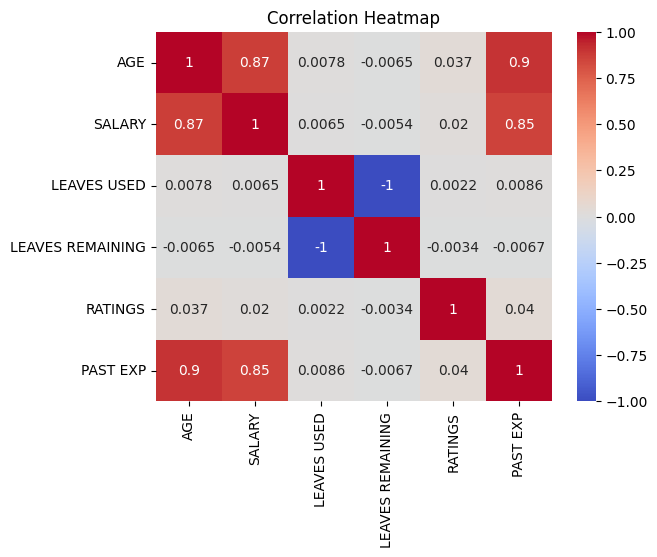

In [5]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

df['TOTAL_EXP'] = df['PAST EXP'] + ((df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25)
df


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TOTAL_EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,4.130732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,14.528405
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.979466
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.954825
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2.809719


In [7]:
df['EXP_IN_CURRENT_ROLE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TOTAL_EXP,EXP_IN_CURRENT_ROLE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,1.639973
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,1.445585
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,2.762491
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,4.130732,1.130732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,14.528405,4.528405
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.979466,1.979466
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.954825,1.954825
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2.809719,1.809719


In [8]:
df['LEAVE_UTILIZATION_RATIO'] = df['LEAVES USED'] / (df['LEAVES USED'] + df['LEAVES REMAINING'])
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TOTAL_EXP,EXP_IN_CURRENT_ROLE,LEAVE_UTILIZATION_RATIO
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973,1.639973,0.800000
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585,1.445585,0.766667
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491,2.762491,0.733333
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,4.130732,1.130732,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,14.528405,4.528405,0.500000
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.979466,1.979466,0.566667
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.954825,1.954825,0.966667
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2.809719,1.809719,0.766667


In [9]:
columns_to_drop = ['AGE', 'PAST EXP','LEAVES USED','LEAVES REMAINING']
df = df.drop(columns=columns_to_drop)


In [10]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,SALARY,UNIT,RATINGS,TOTAL_EXP,EXP_IN_CURRENT_ROLE,LEAVE_UTILIZATION_RATIO
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,44570,Finance,2.0,1.639973,1.639973,0.800000
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,89207,Web,NaN,NaN,NaN,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,40955,Finance,3.0,1.445585,1.445585,0.766667
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,45550,IT,3.0,2.762491,2.762491,0.733333
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,43161,Operations,NaN,4.130732,1.130732,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,185977,Management,5.0,14.528405,4.528405,0.500000
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,45758,IT,2.0,1.979466,1.979466,0.566667
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,47315,Web,5.0,1.954825,1.954825,0.966667
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,45172,Web,3.0,2.809719,1.809719,0.766667


In [11]:
duplicate_mask = df.duplicated()

duplicate_rows = df[duplicate_mask]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     FIRST NAME LAST NAME SEX        DOJ CURRENT DATE     DESIGNATION  SALARY  \
104        CARI  ARENALES   F 2014-04-10   2016-01-07  Senior Analyst   66338   
248      BOBBIE      AIDT   M 2013-06-29   2016-01-07  Senior Analyst   68505   
400        JUAN   ABBASSI   M 2013-07-01   2016-01-07  Senior Analyst   61575   
422       JODIE   ANIELLO   F 2014-10-29   2016-01-07         Analyst   43137   
446        ALEX  ABOLAFIA   M 2013-11-10   2016-01-07         Analyst   43352   
...         ...       ...  ..        ...          ...             ...     ...   
2576      ROMEO   AINSLEY   M 2014-11-20   2016-01-07         Analyst   41052   
2591      ROYCE    AGOSTO   M 2014-06-07   2016-01-07         Analyst   48651   
2600     SHEREE     APPEL   F 2013-09-24   2016-01-07         Analyst   49559   
2624     JOSPEH     ALLIS   M 2014-02-26   2016-01-07         Analyst   45364   
2632    MARLENE     AMAYA   F 2014-09-15   2016-01-07         Analyst   43835   

           

In [12]:
df_no_duplicates = df.drop_duplicates()

print("DataFrame without Duplicates:")
print(df_no_duplicates)

DataFrame without Duplicates:
     FIRST NAME   LAST NAME SEX        DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F 2014-05-18   2016-01-07         Analyst   
1         ANNIE         NaN   F        NaT   2016-01-07       Associate   
2         OLIVE        ANCY   F 2014-07-28   2016-01-07         Analyst   
3        CHERRY     AQUILAR   F 2013-04-03   2016-01-07         Analyst   
4          LEON  ABOULAHOUD   M 2014-11-20   2016-01-07         Analyst   
...         ...         ...  ..        ...          ...             ...   
2634  KATHERINE      ALSDON   F 2011-06-28   2016-01-07  Senior Manager   
2635     LOUISE     ALTARAS   F 2014-01-14   2016-01-07         Analyst   
2636      RENEE      ALVINO   F 2014-01-23   2016-01-07         Analyst   
2637       TERI   ANASTASIO   F 2014-03-17   2016-01-07         Analyst   
2638    GREGORY      ABARCA   M 2014-09-18   2016-01-07         Analyst   

      SALARY        UNIT  RATINGS  TOTAL_EXP  EXP_IN_CURRENT_ROLE  \


In [13]:
columns_to_drop = ['DOJ', 'CURRENT DATE']
df_no_duplicates = df_no_duplicates.drop(columns=columns_to_drop)

In [14]:
df_no_duplicates


,FIRST NAME,LAST NAME,SEX,DESIGNATION,SALARY,UNIT,RATINGS,TOTAL_EXP,EXP_IN_CURRENT_ROLE,LEAVE_UTILIZATION_RATIO
0,TOMASA,ARMEN,F,Analyst,44570,Finance,2.0,1.639973,1.639973,0.800000
1,ANNIE,NaN,F,Associate,89207,Web,NaN,NaN,NaN,NaN
2,OLIVE,ANCY,F,Analyst,40955,Finance,3.0,1.445585,1.445585,0.766667
3,CHERRY,AQUILAR,F,Analyst,45550,IT,3.0,2.762491,2.762491,0.733333
4,LEON,ABOULAHOUD,M,Analyst,43161,Operations,NaN,4.130732,1.130732,0.900000
...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,Senior Manager,185977,Management,5.0,14.528405,4.528405,0.500000
2635,LOUISE,ALTARAS,F,Analyst,45758,IT,2.0,1.979466,1.979466,0.566667
2636,RENEE,ALVINO,F,Analyst,47315,Web,5.0,1.954825,1.954825,0.966667
2637,TERI,ANASTASIO,F,Analyst,45172,Web,3.0,2.809719,1.809719,0.766667


In [15]:
print(df_no_duplicates.isnull().sum())
df = df_no_duplicates.dropna()
df

FIRST NAME                 0
LAST NAME                  2
SEX                        0
DESIGNATION                0
SALARY                     0
UNIT                       0
RATINGS                    2
TOTAL_EXP                  1
EXP_IN_CURRENT_ROLE        1
LEAVE_UTILIZATION_RATIO    5
dtype: int64


,FIRST NAME,LAST NAME,SEX,DESIGNATION,SALARY,UNIT,RATINGS,TOTAL_EXP,EXP_IN_CURRENT_ROLE,LEAVE_UTILIZATION_RATIO
0,TOMASA,ARMEN,F,Analyst,44570,Finance,2.0,1.639973,1.639973,0.800000
2,OLIVE,ANCY,F,Analyst,40955,Finance,3.0,1.445585,1.445585,0.766667
3,CHERRY,AQUILAR,F,Analyst,45550,IT,3.0,2.762491,2.762491,0.733333
6,ELLIOT,AGULAR,M,Analyst,40339,Marketing,5.0,2.346338,2.346338,0.633333
7,JACQUES,AKMAL,M,Analyst,40058,Marketing,2.0,4.088980,2.088980,0.966667
...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,Senior Manager,185977,Management,5.0,14.528405,4.528405,0.500000
2635,LOUISE,ALTARAS,F,Analyst,45758,IT,2.0,1.979466,1.979466,0.566667
2636,RENEE,ALVINO,F,Analyst,47315,Web,5.0,1.954825,1.954825,0.966667
2637,TERI,ANASTASIO,F,Analyst,45172,Web,3.0,2.809719,1.809719,0.766667


In [16]:
df = df.reset_index()


In [69]:
df.head(100)

,index,FIRST NAME,LAST NAME,SEX,DESIGNATION,SALARY,UNIT,RATINGS,TOTAL_EXP,EXP_IN_CURRENT_ROLE,LEAVE_UTILIZATION_RATIO
0,0,TOMASA,ARMEN,F,Analyst,44570,Finance,2.0,1.639973,1.639973,0.800000
1,2,OLIVE,ANCY,F,Analyst,40955,Finance,3.0,1.445585,1.445585,0.766667
2,3,CHERRY,AQUILAR,F,Analyst,45550,IT,3.0,2.762491,2.762491,0.733333
3,6,ELLIOT,AGULAR,M,Analyst,40339,Marketing,5.0,2.346338,2.346338,0.633333
4,7,JACQUES,AKMAL,M,Analyst,40058,Marketing,2.0,4.088980,2.088980,0.966667
...,...,...,...,...,...,...,...,...,...,...,...
95,102,ELIZA,ANSBACHER,F,Senior Analyst,50813,Marketing,2.0,2.269678,2.269678,0.866667
96,103,YONG,ALDERFER,M,Manager,129191,Operations,4.0,8.711157,5.711157,0.733333
97,105,ALVA,ALAMPI,M,Analyst,46749,Operations,5.0,3.051335,1.051335,0.933333
98,106,REINA,ARMAGOST,F,Manager,108665,Finance,2.0,10.229979,4.229979,0.500000


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import joblib
import json

categorical_columns = ['DESIGNATION', 'UNIT']
numerical_columns = ['RATINGS', 'TOTAL_EXP', 'EXP_IN_CURRENT_ROLE', 'LEAVE_UTILIZATION_RATIO']

X = df[categorical_columns + numerical_columns]
y = df['SALARY']

designation_encoder = LabelEncoder()
unit_encoder = LabelEncoder()

X['DESIGNATION'] = designation_encoder.fit_transform(X['DESIGNATION'])
X['UNIT'] = unit_encoder.fit_transform(X['UNIT'])

joblib.dump(designation_encoder, 'designation_encoder.joblib')
joblib.dump(unit_encoder, 'unit_encoder.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

joblib.dump(linear_reg_model, 'linear_reg_model.joblib')
joblib.dump(decision_tree_model, 'decision_tree_model.joblib')
joblib.dump(random_forest_model, 'random_forest_model.joblib')
joblib.dump(gradient_boosting_model, 'gradient_boosting_model.joblib')

label_encoder_mapping = {
    'designation_mapping': dict(zip(designation_encoder.classes_, map(int, designation_encoder.transform(designation_encoder.classes_)))),
    'unit_mapping': dict(zip(unit_encoder.classes_, map(int, unit_encoder.transform(unit_encoder.classes_))))
}

with open('label_encoder_mapping.json', 'w') as file:
    json.dump(label_encoder_mapping, file)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}\n")

evaluate_model(linear_reg_model, X_test, y_test, "Linear Regression")
evaluate_model(decision_tree_model, X_test, y_test, "Decision Tree")
evaluate_model(random_forest_model, X_test, y_test, "Random Forest")
evaluate_model(gradient_boosting_model, X_test, y_test, "Gradient Boosting")

<ipython-input-61-92c60929e832>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DESIGNATION'] = designation_encoder.fit_transform(X['DESIGNATION'])
<ipython-input-61-92c60929e832>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['UNIT'] = unit_encoder.fit_transform(X['UNIT'])


Linear Regression Metrics:
Mean Absolute Error (MAE): 10454.99981386348
Mean Squared Error (MSE): 283559775.59301275
Root Mean Squared Error (RMSE): 16839.23322461604
R-squared (R2): 0.8108669574215459

Decision Tree Metrics:
Mean Absolute Error (MAE): 6023.141414141414
Mean Squared Error (MSE): 92895564.11919191
Root Mean Squared Error (RMSE): 9638.23449181394
R-squared (R2): 0.9380390937072756

Random Forest Metrics:
Mean Absolute Error (MAE): 4462.739535353535
Mean Squared Error (MSE): 57792795.48767495
Root Mean Squared Error (RMSE): 7602.15729169523
R-squared (R2): 0.9614524760190717

Gradient Boosting Metrics:
Mean Absolute Error (MAE): 4453.234052199819
Mean Squared Error (MSE): 67511573.6674364
Root Mean Squared Error (RMSE): 8216.542683357546
R-squared (R2): 0.9549700964804392

Model training completed successfully.


In [44]:
pip install Flask


In [62]:
import joblib

joblib.dump(random_forest_model, 'random_forest_model.joblib')
joblib.dump(linear_reg_model, 'linear_reg_model.joblib')


['linear_reg_model.joblib']

In [63]:
import joblib

# Load the model
try:
    random_forest_model = joblib.load('random_forest_model.joblib')
except Exception as e:
    print(f"Error loading the model: {e}")


In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import os

# Specify the project directory
project_dir = '/content/drive/MyDrive/MyMLProject'

# Create the project directory if it doesn't exist
if not os.path.exists(project_dir):
    os.makedirs(project_dir)


In [66]:
!cp Salary\ Prediction\ of\ Data\ Professions.csv /content/drive/MyDrive/MyMLProject
!cp linear_reg_model.joblib /content/drive/MyDrive/MyMLProject
!cp random_forest_model.joblib /content/drive/MyDrive/MyMLProject
!cp label_encoder.joblib /content/drive/MyDrive/MyMLProject
!cp gradient_boosting_model.joblib /content/drive/MyDrive/MyMLProject
!cp decision_tree_model.joblib /content/drive/MyDrive/MyMLProject
!cp label_encoder_mapping.json /content/drive/MyDrive/MyMLProject

In [67]:
print("Number of coefficients:", len(linear_reg_model.coef_))


Number of coefficients: 6
